In [11]:
# !user/bin/env/python3
# -*- coding: utf-8 -*-
"""
@author: cyy
"""

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
data_train = pd.read_csv('E:/kaggle/Digit_Recognizer/train.csv')
data_train = data_train.values[:1000]

In [28]:
labels = data_train[:, 0]
data = data_train[:, 1:]

In [29]:
def nomalizing(array):
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if array[i, j] != 0:
                array[i, j] = 1
    return array

In [30]:
data = nomalizing(data)

In [31]:
k_error = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, data, labels, cv=10, n_jobs=-1, scoring='balanced_accuracy')
    k_error.append(1 - scores.mean())

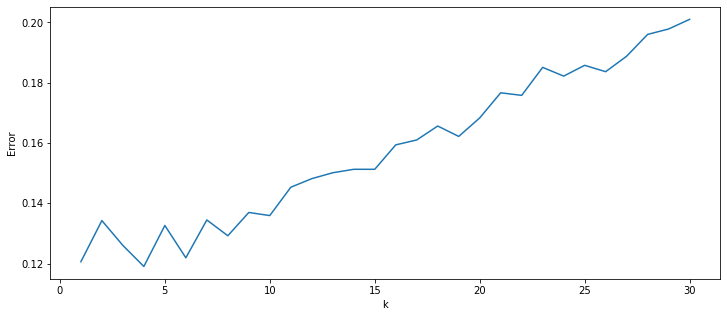

In [32]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(111)
plt.plot(list(range(1, 31)), k_error)
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='brute', p=2, metric='euclidean', n_jobs=-1)
knn.fit(data, labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [34]:
data_test = pd.read_csv('E:/kaggle/Digit_Recognizer/test.csv')
data_test = data_test.values
predictions = knn.predict(data_test)
result = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label':predictions})
result.to_csv('E:/kaggle/Digit_Recognizer/submission.csv', index=False)

In [93]:
def KnnClassifier(inX, dataset, labels, k=5):
    size = dataset.shape[0]
    diff = np.tile(inX, (size, 1)) - dataset
    square = diff ** 2
    distances = np.sqrt(square.sum(axis=1))
    arg_sort = np.argsort(distances)
    distances_count = {}
    for i in range(k):
        distances_count[labels[arg_sort[i]]] = distances_count.get(labels[arg_sort[i]], 0) + 1
    distances_sort = sorted(distances_count.items(), key=lambda x: x[1], reverse=True)
    return distances_sort[0][0]

In [98]:
group = np.array([[1, 1.1], [1, 1], [0, 0], [0, 0.1]])
labels = list('AABB')
KnnClassifier([-1, -1], group, labels, 3)

'B'